In [1]:
import pickle

In [4]:
import pandas as pd
import numpy as np

In [5]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation

In [9]:
lda_models = pickle.load( open( "lda_models_5-29_3000_features.p", "rb" ) )
tf_sets = pickle.load( open( "lda_models_5-29_3000_features_tf_source.p", "rb" ) )


In [7]:
lda_models

{5: LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                           max_iter=5, n_components=5, random_state=0),
 6: LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                           max_iter=5, n_components=6, random_state=0),
 7: LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                           max_iter=5, n_components=7, random_state=0),
 8: LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                           max_iter=5, n_components=8, random_state=0),
 9: LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                           max_iter=5, n_components=9, random_state=0),
 10: LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                           max_iter=5, random_state=0),
 11: LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                           max_iter=

In [14]:
lda_models[6]

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=6, random_state=0)

In [15]:
tf_feature_names = tf_sets['tf_vectorizer'].get_feature_names_out()

In [13]:
def get_top_words_list(model, feature_names, n_top_words):
    res = []
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        frame = pd.DataFrame(data={'word': top_features, 'weight': weights})
        res.append(frame)
    
    return res

In [16]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [18]:
top_words = get_top_words_list(lda_models[6], tf_feature_names, 50)

In [19]:
top_words

[         word         weight
 0      brasil  513977.032927
 1      mortes  512532.093426
 2       covid  479928.365509
 3          19  306330.150239
 4         mil  235314.091741
 5          24  151178.669960
 6       horas  131924.075089
 7      mortos  131602.893448
 8      óbitos  125208.483402
 9      número  119593.922992
 10    recorde  109303.892447
 11        dia  108940.835646
 12    últimas  103281.160642
 13   pandemia   99825.906709
 14         10   96071.311886
 15    federal   95524.634811
 16        780   92660.054558
 17      casos   84955.046459
 18        24h   75067.336213
 19       país   70313.893152
 20       hoje   70220.340728
 21   registra   64802.597748
 22       novo   63454.136115
 23   genocida   62569.879206
 24        diz   59499.119555
 25      maior   58370.688028
 26      desde   56909.087679
 27      feira   51081.136602
 28  população   48329.691447
 29        529   43091.460899
 30         3º   43030.757868
 31      total   42596.428603
 32       

IndexError: index 10 is out of bounds for axis 0 with size 10

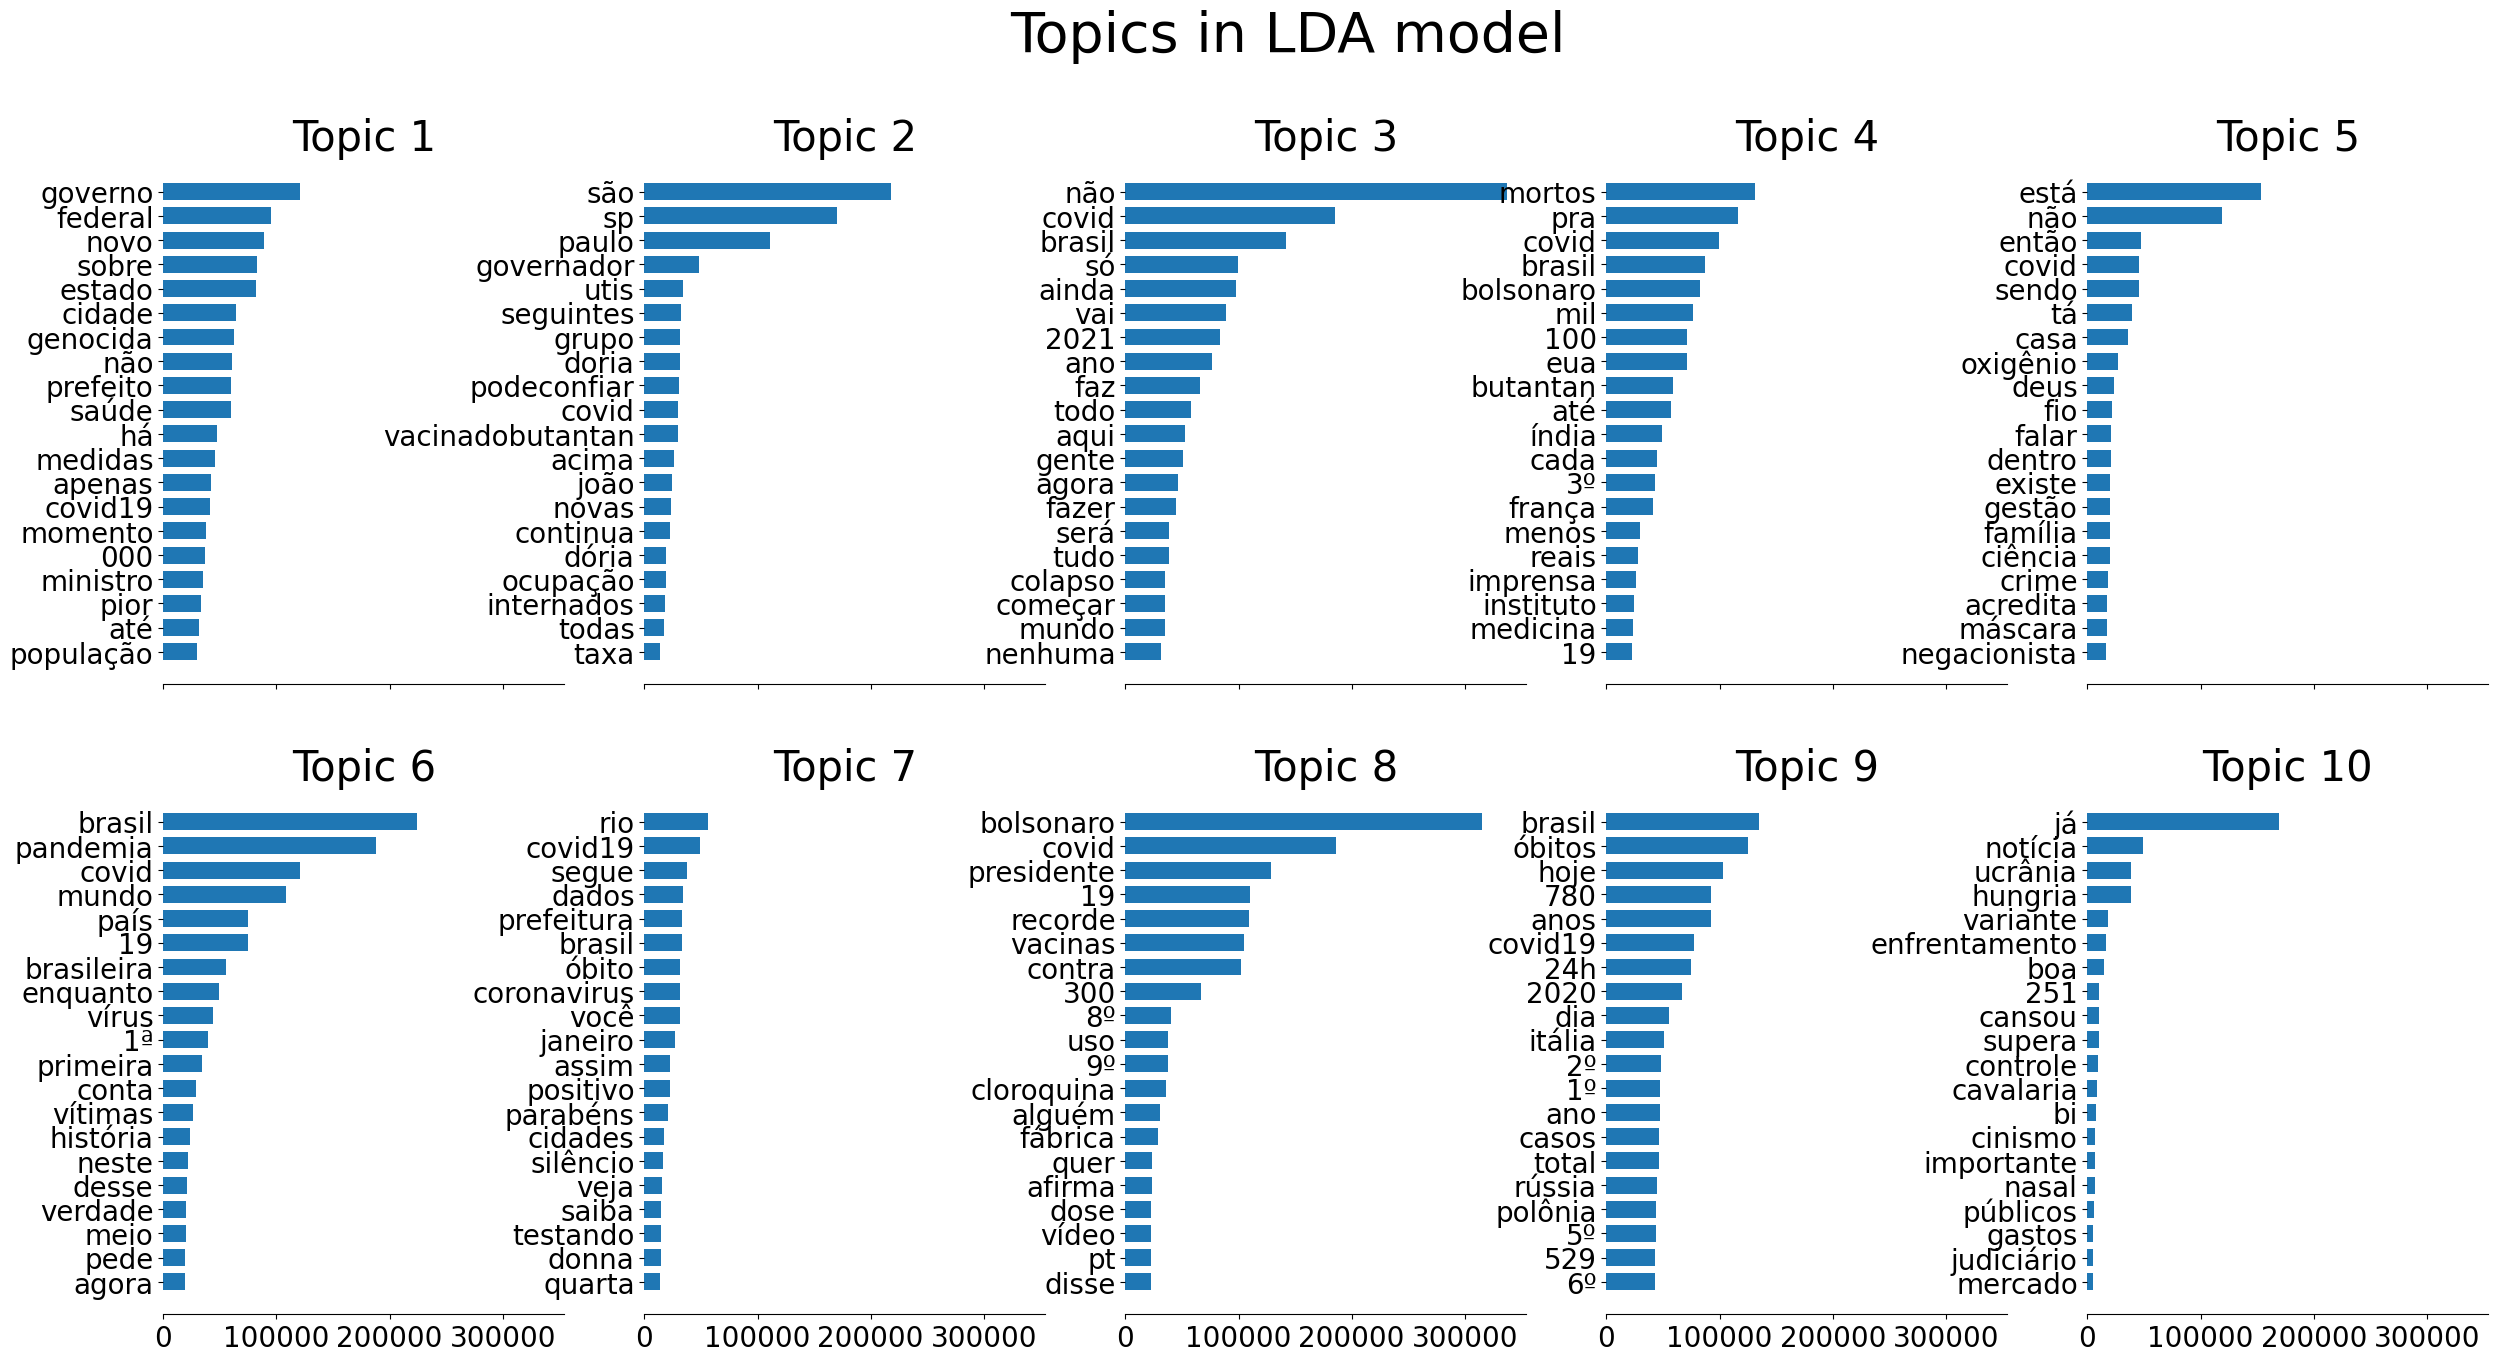

In [20]:
plot_top_words(lda_models[20], tf_feature_names, 20, "Topics in LDA model")